In [1]:
from micrograd.engine import Value
import micrograd.mlp_neural_network as nn
from drawgraph.neuralnet import draw_dot

In [2]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [3]:
mlp = nn.MLP(3, [4, 4, 1]) # (nin, nouts) where 'nin': no. of inputs at leaf, 'nouts': no. of neurons/output at each layer of total 'len(nouts)' layer
print(f"Number of parameters of this NN: {len(mlp.parameters())}")

Number of parameters of this NN: 41


In [4]:
ypred = [mlp(x) for x in xs] # currently predicted outputs
ypred

[Value(data = 0.23204704104916846),
 Value(data = 0.24369129478915422),
 Value(data = 0.3424949962684539),
 Value(data = 0.024917404683375555)]

In [5]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data = 4.8895986665909)

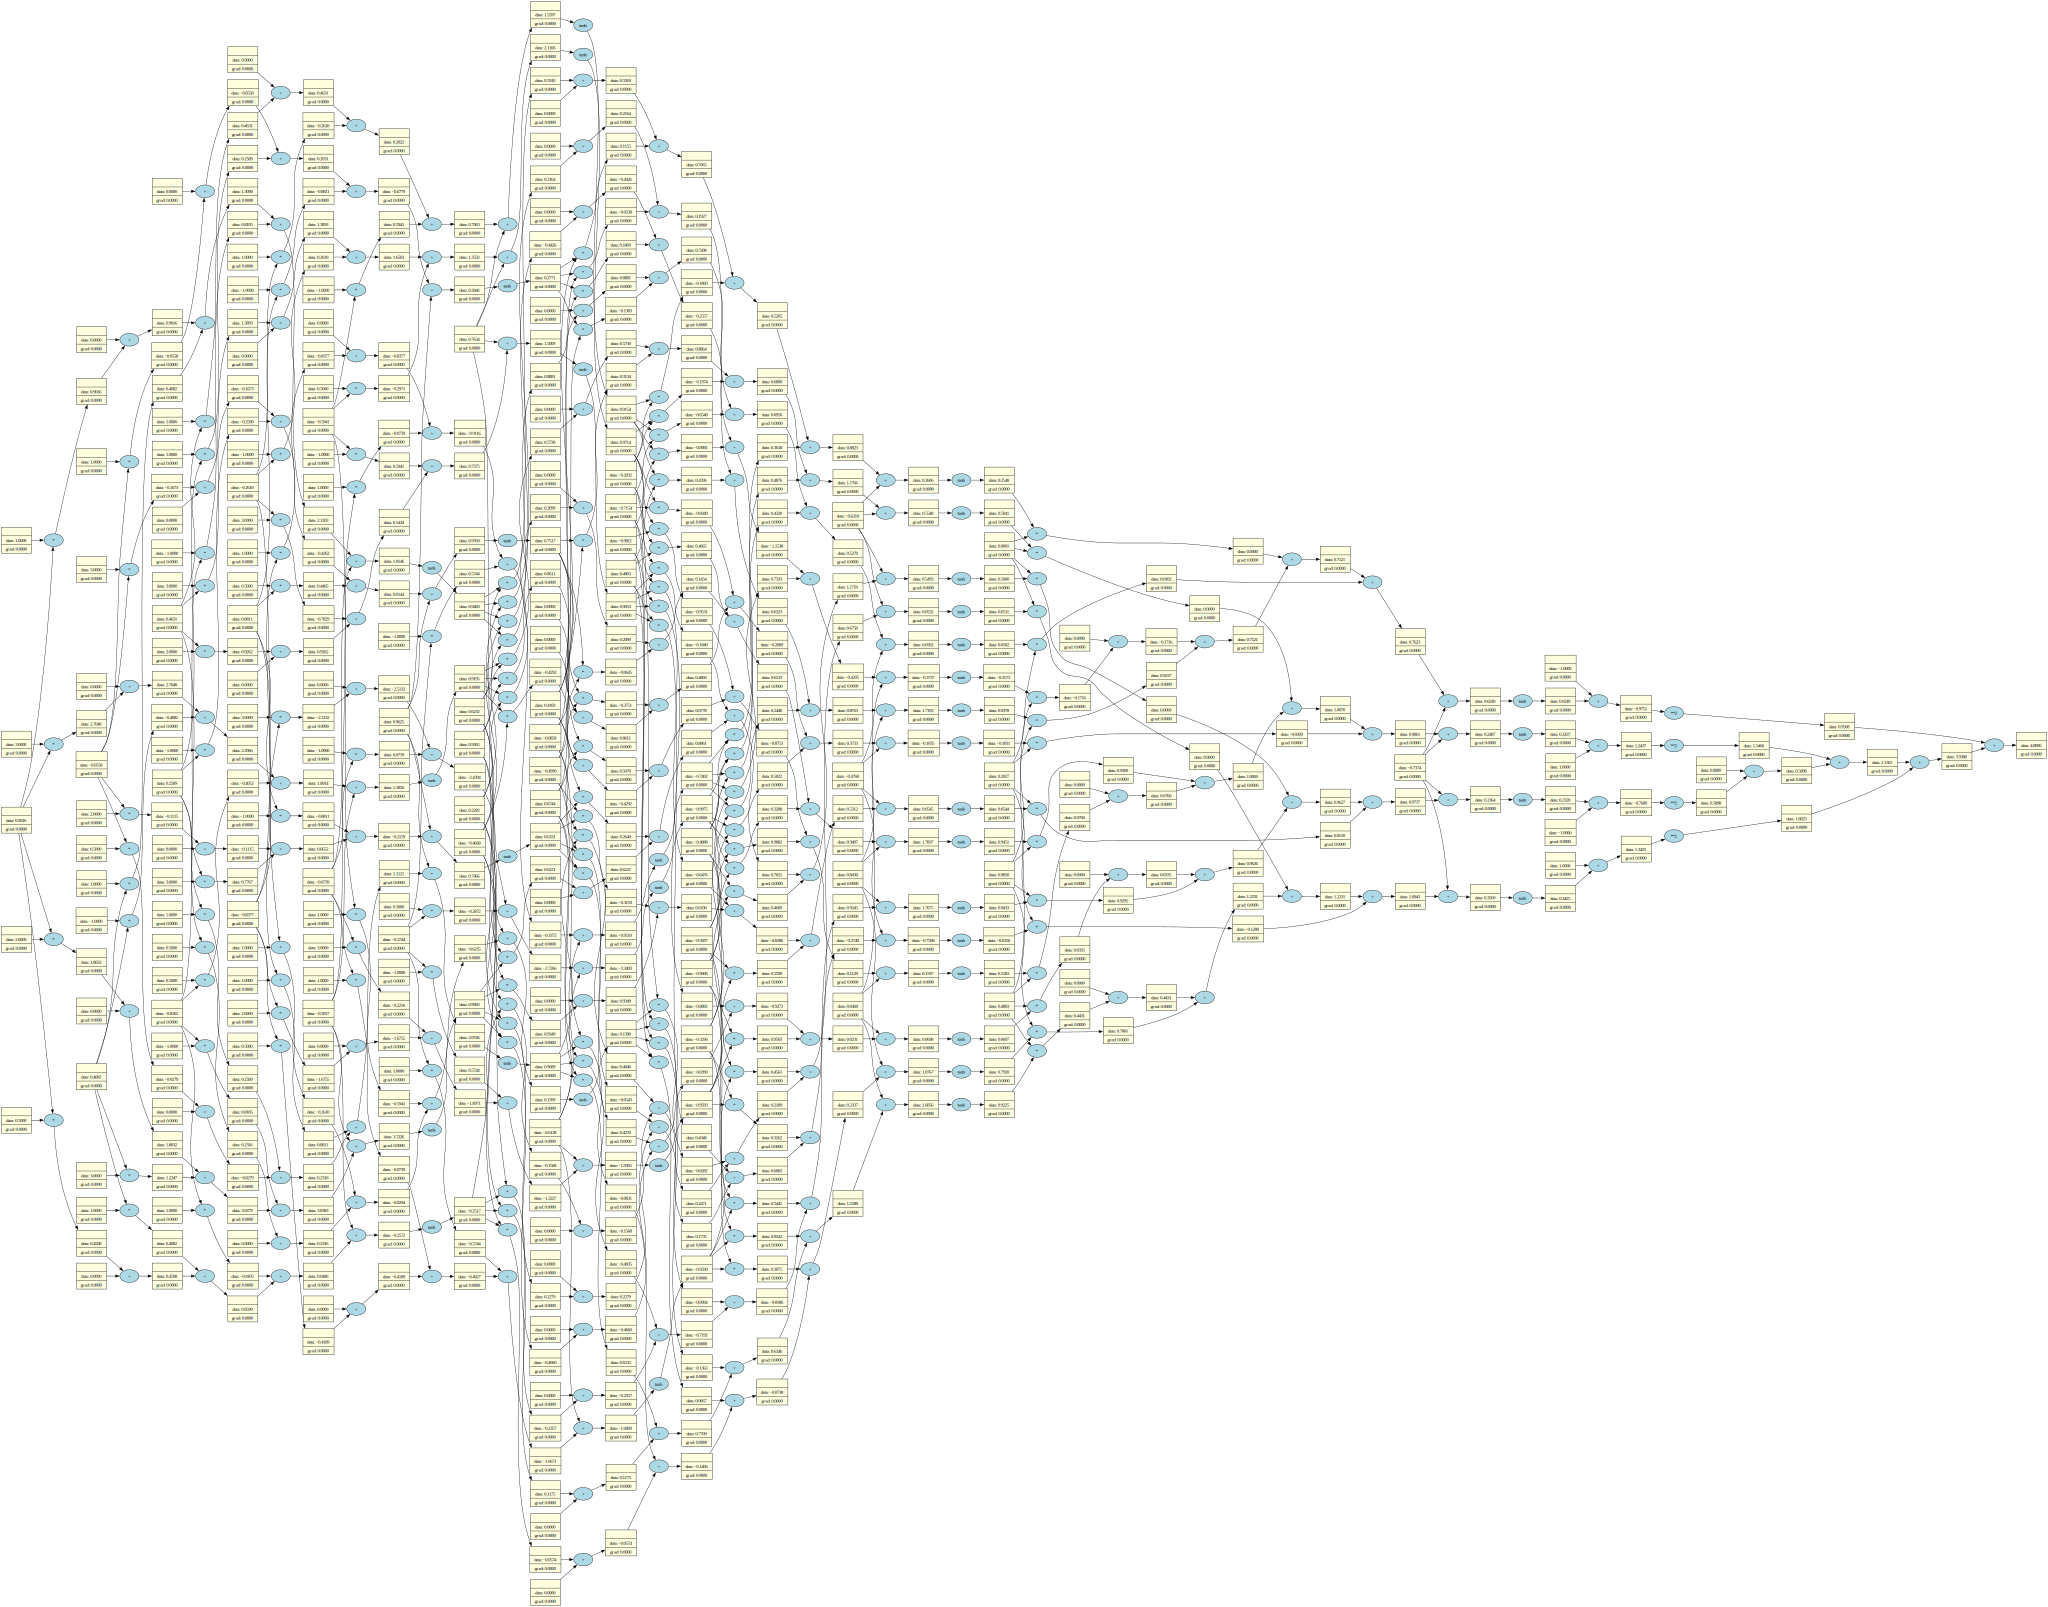

In [6]:
draw_dot(loss) #visualize the current forward pass upto the loss function

For loop (N iterations) to minimize the Loss Function using **Gradient Descent**

In [7]:
for k in range(50):
  
  # forward pass
  ypred = [mlp(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in mlp.parameters():
    p.grad = 0.0 # super important to flush the grads
  loss.backward()
  
  # update parameters with gradient descent
  for p in mlp.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 4.8895986665909
1 3.348655653742422
2 2.7352858371434094
3 2.152270996745094
4 1.3686014970408877
5 0.7722077371619446
6 0.08484400179050357
7 0.06918384782868914
8 0.058157693417990826
9 0.04998842589551346
10 0.043708416271807084
11 0.03874189270518903
12 0.03472417514423425
13 0.03141306996781578
14 0.02864155156331834
15 0.026290816911527154
16 0.02427414400209206
17 0.022526813433220397
18 0.020999593592325047
19 0.01965440285793056
20 0.018461346358619832
21 0.017396645762901904
22 0.01644116396355995
23 0.015579334927970964
24 0.014798375004018609
25 0.0140876932479252
26 0.013438444762314677
27 0.01284318830789885
28 0.012295620965448735
29 0.011790370432990211
30 0.011322830923907371
31 0.01088903239431881
32 0.01048553549509446
33 0.010109346558064773
34 0.009757848315885652
35 0.009428743075229312
36 0.009120005819404047
37 0.008829845282691581
38 0.008556671466244347
39 0.00829906839095259
40 0.008055771132552635
41 0.007825646377428684
42 0.007607675887970404
43 0.007400

In [8]:
print("predicted\ttarget\n")
for i in range(len(ys)):
    print(f"{ypred[i].data:.4f}\t\t{ys[i]}")

predicted	target

0.9557		1.0
-0.9612		-1.0
-0.9820		-1.0
0.9494		1.0


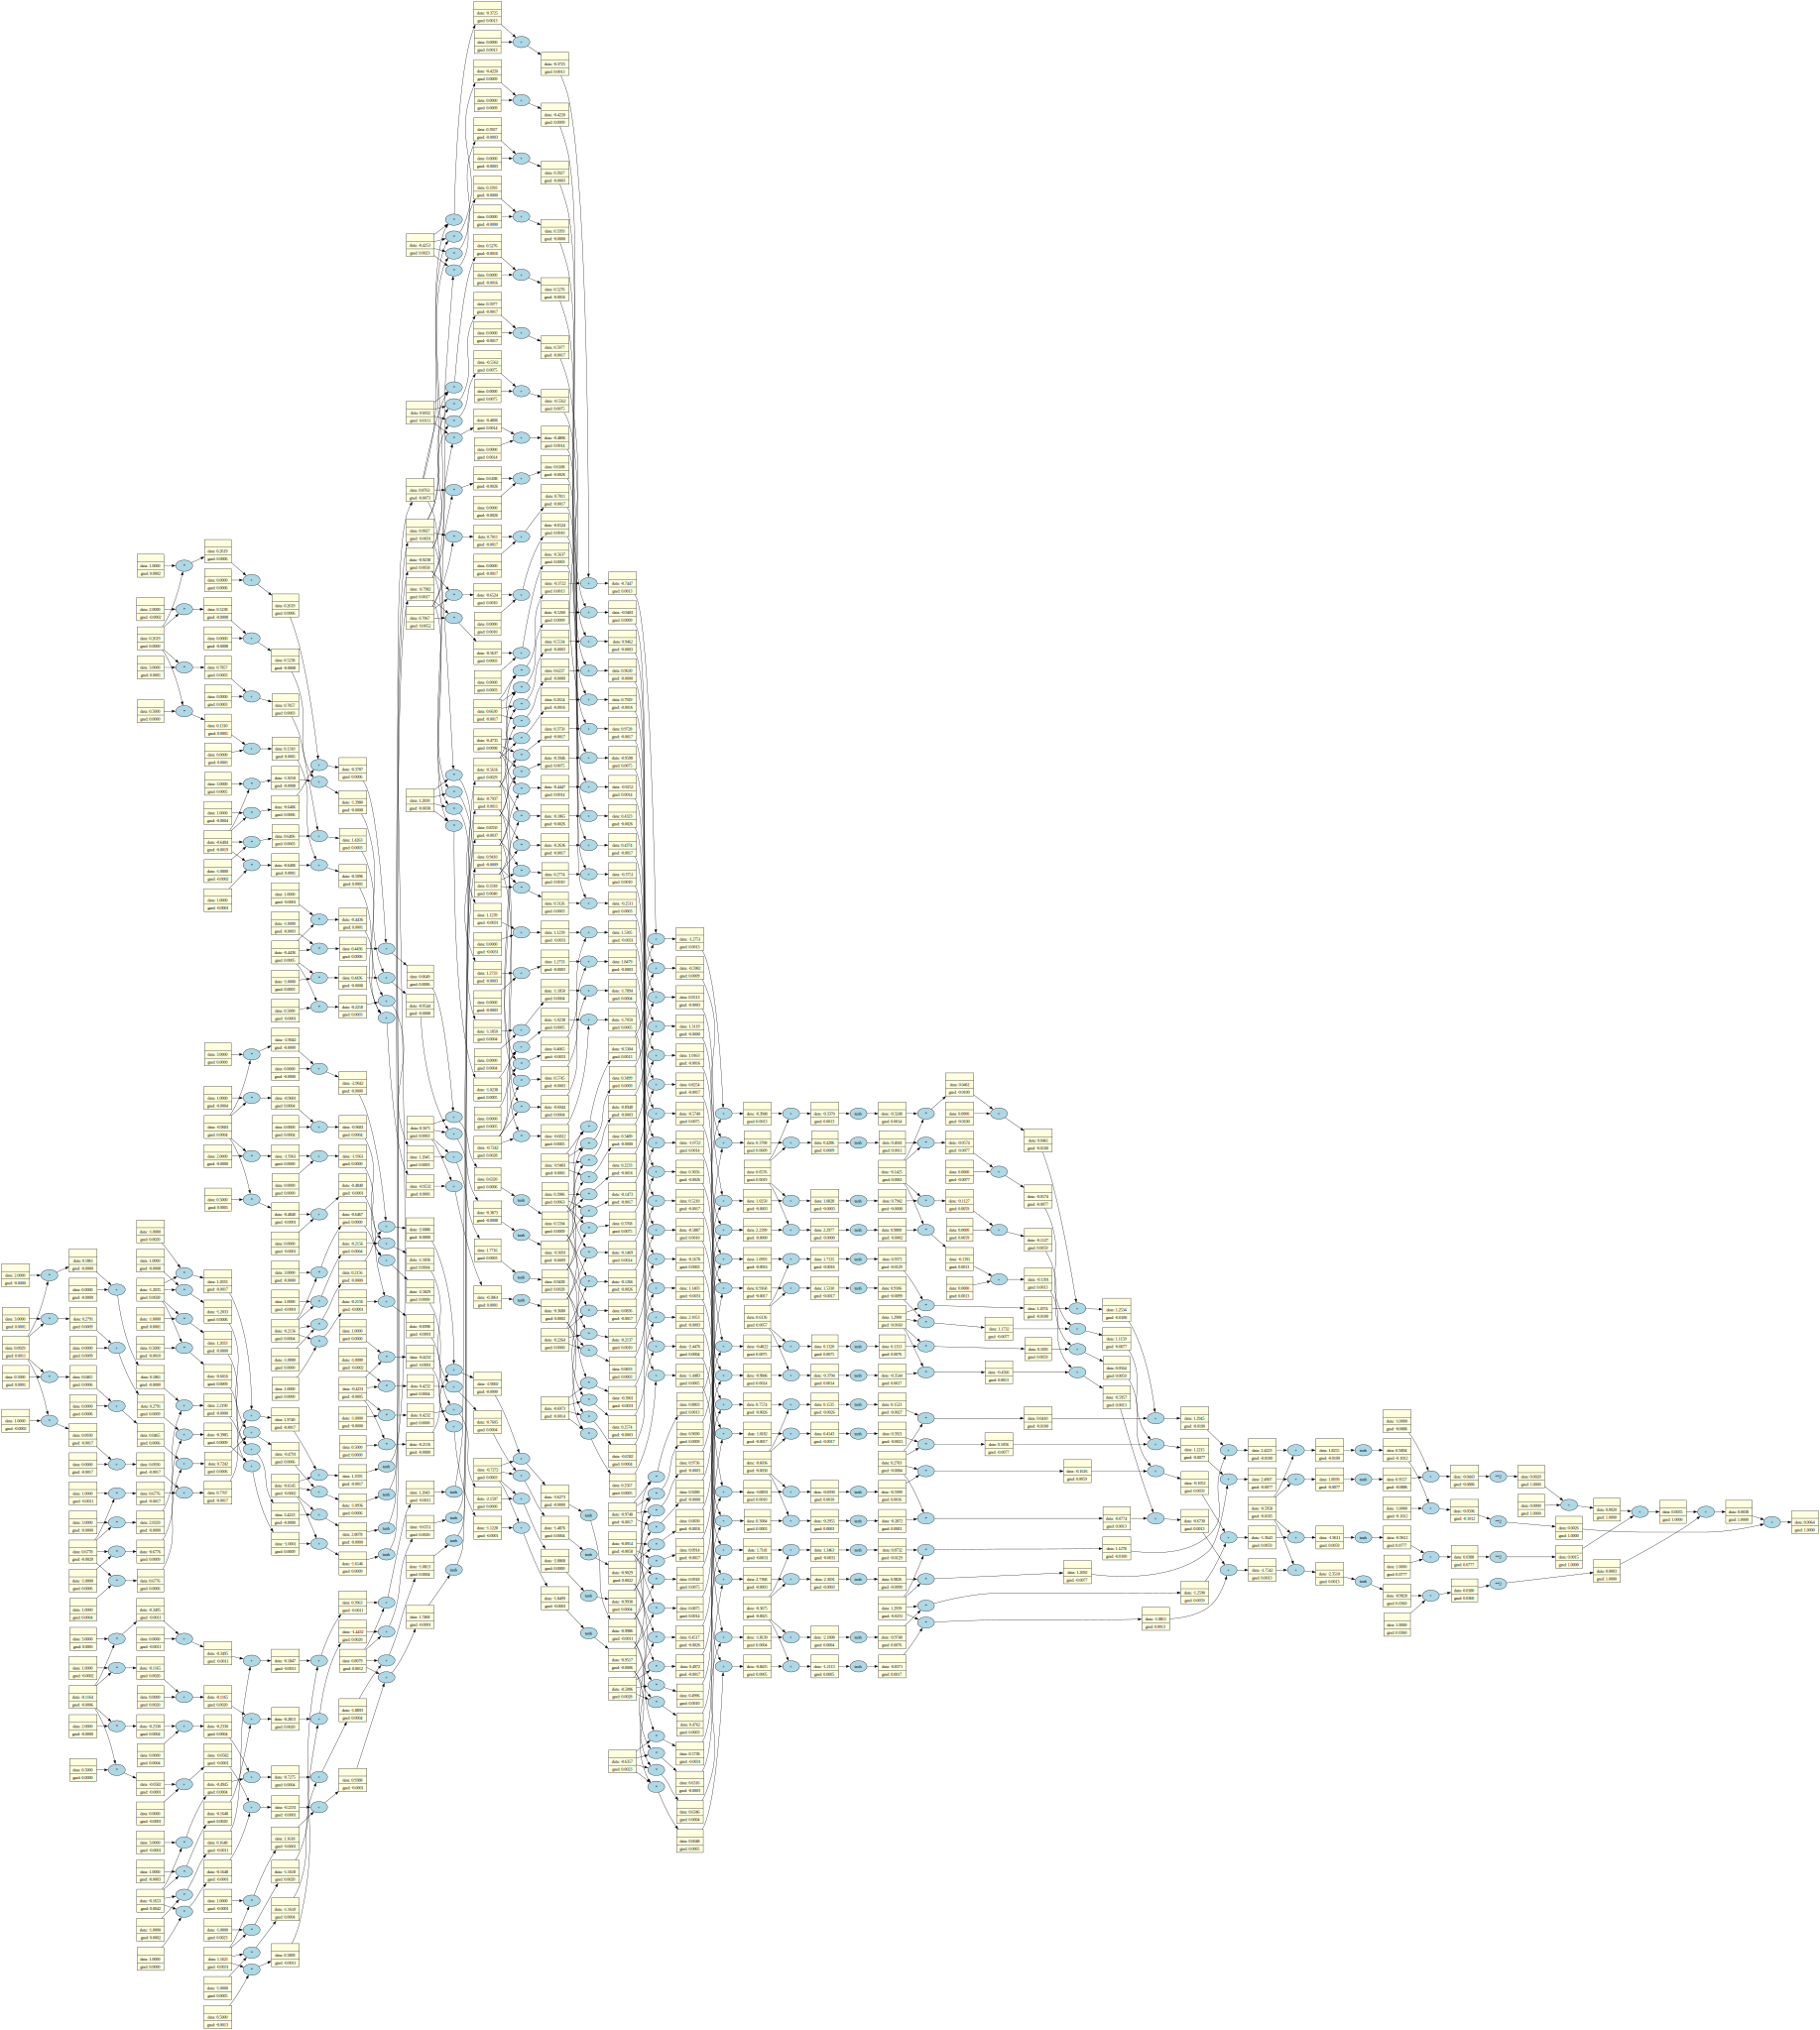

In [9]:
draw_dot(loss)